# Chapter 2 Statistical Learning

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
import numpy as np

## Exercise 8

8. This exercise relates to the College data set, which can be found in
the fle College.csv on the book website. It contains a number of
variables for 777 diferent universities and colleges in the US. The
variables are
• Private : Public/private indicator
• Apps : Number of applications received
• Accept : Number of applicants accepted
• Enroll : Number of new students enrolled
• Top10perc : New students from top 10 % of high school class
• Top25perc : New students from top 25 % of high school class
• F.Undergrad : Number of full-time undergraduates
• P.Undergrad : Number of part-time undergraduates
• Outstate : Out-of-state tuition
• Room.Board : Room and board costs
• Books : Estimated book costs
• Personal : Estimated personal spending
• PhD : Percent of faculty with Ph.D.s
• Terminal : Percent of faculty with terminal degree
• S.F.Ratio : Student/faculty ratio
• perc.alumni : Percent of alumni who donate
• Expend : Instructional expenditure per student
• Grad.Rate : Graduation rate
Before reading the data into Python, it can be viewed in Excel or a
text editor.

(a) Use the pd.read_csv() function to read the data into Python. Call
the loaded data college. Make sure that you have the directory
set to the correct location for the data.

In [4]:
college = pd.read_csv('/home/hinojosaad/repos/islp/datasets/College.csv')
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


Look at the data used in the notebook by creating and running
a new cell with just the code college in it. You should notice
that the first column is just the name of each university in a
column named something like Unnamed: 0. We don’t really want
pandas to treat this as data. However, it may be handy to have
these names for later. Try the following commands and similarly
look at the resulting data frames:

In [5]:
college2 = pd.read_csv('/home/hinojosaad/repos/islp/datasets/College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'},
axis=1)
college3 = college3.set_index('College')

In [6]:
college2

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [7]:
college3

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [8]:
college=college3

(c) Use the describe() method of to produce a numerical summary
of the variables in the data set.

In [9]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(d) Use the pd.plotting.scatter_matrix() function to produce a
scatterplot matrix of the first columns [Top10perc, Apps, Enroll].
Recall that you can reference a list C of columns of a data frame
A using A[C].

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

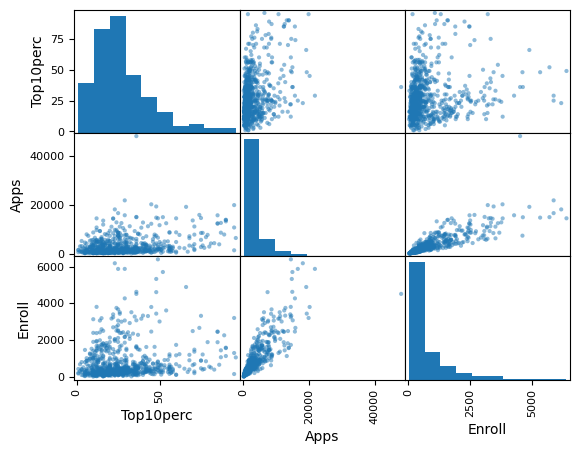

In [12]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps','Enroll']])

(e) Use the boxplot() method of college to produce side-by-side
boxplots of Outstate versus Private.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

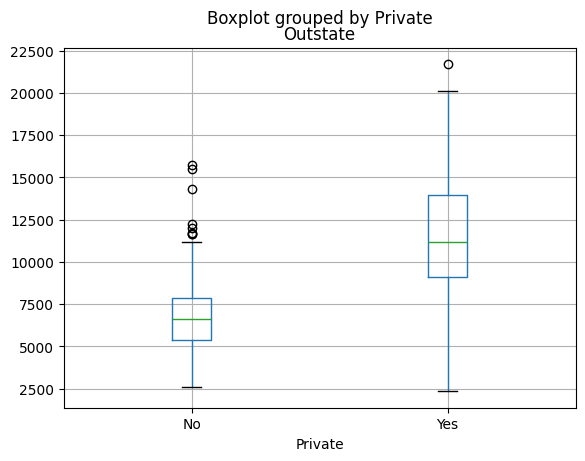

In [15]:
college.boxplot(column=['Outstate'], by='Private')

(f) Create a new qualitative variable, called Elite, by binning the
Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high
school classes exceeds 50%.

In [20]:
college['Elite'] = pd.cut(college['Top10perc'],[0,50,100],labels=['No', 'Yes'])

Use the value_counts() method of college['Elite'] to see how
many elite universities there are. Finally, use the boxplot() method
again to produce side-by-side boxplots of Outstate versus Elite.

In [21]:
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

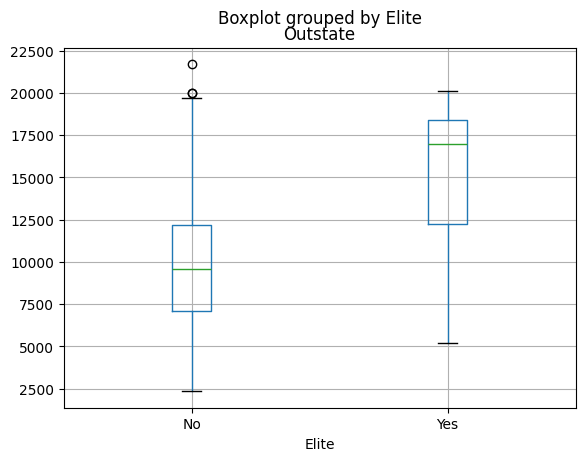

In [23]:
college.boxplot(column=['Outstate'], by='Elite');

(g) Use the plot.hist() method of college to produce some histograms
with differing numbers of bins for a few of the quantitative
variables. The command plt.subplots(2, 2) may be useful:
it will divide the plot window into four regions so that four
plots can be made simultaneously. By changing the arguments
you can divide the screen up in other combinations.

In [24]:
college.columns.to_list()

['Private',
 'Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate',
 'Elite']

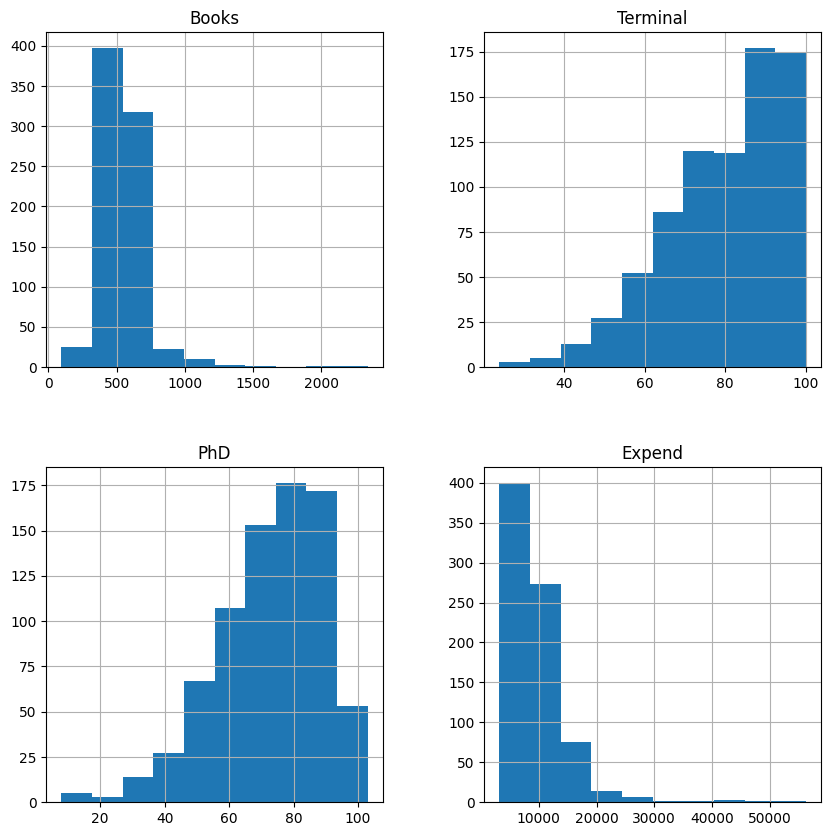

In [28]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
college.hist('Books',bins=10, ax=ax[0, 0])
college.hist('PhD',bins=10, ax=ax[1, 0])
college.hist('Terminal',bins=10, ax=ax[0, 1])
college.hist('Expend',bins=10, ax=ax[1, 1]);

## Exercise 9

9. This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.
(a) Which of the predictors are quantitative, and which are qualitative?


In [2]:
Auto  = load_data("Auto")
Auto= Auto.dropna()

In [3]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


Quantitative: mpg, cylinders, displacement, horsepower, weight, acceleration, year
Qualitative: origin


(b) What is the range of each quantitative predictor? You can answer
this using the min() and max() methods in numpy. .min()


In [5]:
for col in Auto.columns:
    if col != 'origin':
        r = np.max(Auto[col]) - np.min(Auto[col])
        print(f"{col}: {r}")

mpg: 37.6
cylinders: 5
displacement: 387.0
horsepower: 184
weight: 3527
acceleration: 16.8
year: 12


(c) What is the mean and standard deviation of each quantitative .max()
predictor?
2.4 Exercises 67
(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?
(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.
(f) Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.